#### 영화리뷰

##### 워드클라우드 계속

In [37]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

# 워드클라우드 한글 문제해결
from wordcloud import WordCloud
from PIL import Image, ImageOps

fontpath = 'C:/Windows/Fonts/GeonggiV_Bold.ttf'
wc_font = 'C:/Windows/Fonts/HANBatang.ttf'
font = font_manager.FontProperties(fname=fontpath).get_name() # 'GeonggiV_Bold'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [38]:
# konlpy import
from konlpy.tag import Okt
import collections

In [39]:
df = pd.read_csv('./word_lists.csv', encoding='utf-8', index_col=0)
df.tail()

,0
1086135,영화
1086136,최초
1086137,수간
1086138,내용
1086139,영화


In [40]:
temp_list = list(df['0'])  # 리스트로 형변환
len(temp_list)

1086140

In [41]:
counts = collections.Counter(temp_list)

In [42]:
word_tags = counts.most_common(50)

In [43]:
# 시각화
wc = WordCloud(font_path=wc_font, background_color='azure', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(word_tags))

findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\U

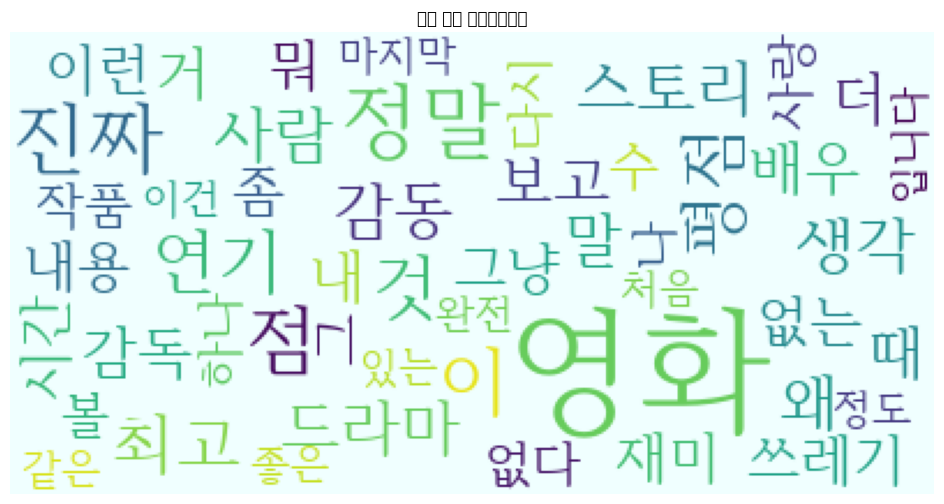

In [44]:
plt.figure(figsize=(15, 6))
plt.title('영화 리뷰 워드클라우드')
plt.imshow(cloud)
plt.axis('off')
plt.show()

##### 불용어 처리
- 리뷰와 관계없는 단어들은 없애는 일(stopword)

In [45]:
from tqdm import tqdm

stopword = ['영화','점','좀','입니다','왜','거','이런','그','때','수','것','내','볼','있는','더','뭐','정도','나',
            '점','보고','그냥','없다','이','없는','다시','하나','이건','좋은','같은','완전','걸','임','없고','개',
            '듯','안','또','난','중','꼭','같다','애','못','때문','편','한번','가장']
last_list = []

for i, item in tqdm(enumerate(temp_list)):
    if item in stopword:
        pass
    else:
        last_list.append(item)

1086140it [00:00, 1297513.22it/s]


In [46]:
counts = collections.Counter(last_list)
word_tags = counts.most_common(50)

findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.


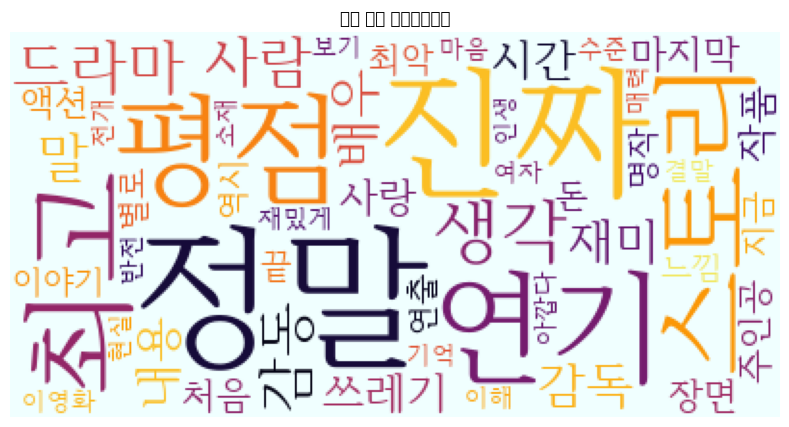

In [47]:
# 불용어 제거 후 워드클라우드
wc = WordCloud(font_path=wc_font, background_color='azure', max_font_size=80, relative_scaling=0.6, colormap='inferno')
cloud = wc.generate_from_frequencies(dict(word_tags))
plt.figure(figsize=(15, 5))
plt.title('영화 리뷰 워드클라우드')
plt.imshow(cloud)
plt.axis('off')
plt.show()

##### 영화 리뷰수가 많은 영화 

In [48]:
dict_df = pd.read_csv('./comment_rank.csv', encoding='utf-8', index_col=0)
dict_df.tail()

,movie,comment,rank
985,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10
986,롱 리브 더 킹: 목포 영웅,NaN,10
987,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,8
988,아수라,찢었다...모든게 찢었다.,9
989,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9


In [49]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movie    990 non-null    object
 1   comment  891 non-null    object
 2   rank     990 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [50]:
dict_df['comment'].isnull().sum()

99

In [51]:
dict_df.dropna(axis=0, inplace=True)
dict_df

,movie,comment,rank
0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,아수라,찢었다...모든게 찢었다.,10
5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...
984,언포기버블,영화의 단조로운 스토리를 긴장감있,10
985,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10
987,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,8
988,아수라,찢었다...모든게 찢었다.,9


In [52]:
dict_df['movie'].unique()

array(['언포기버블', '인질', '싱크홀', '아수라', '고양이 집사', '비바리움', '어메이징 스파이더맨',
       '미드소마', '서복', '매트릭스'], dtype=object)

In [53]:
temps = dict_df.groupby('movie')['comment'].count()
temps

movie
고양이 집사        190
매트릭스            8
미드소마           84
비바리움           84
서복             47
싱크홀            99
아수라            99
어메이징 스파이더맨     52
언포기버블          99
인질            129
Name: comment, dtype: int64

In [54]:
temps.index

Index(['고양이 집사', '매트릭스', '미드소마', '비바리움', '서복', '싱크홀', '아수라', '어메이징 스파이더맨',
       '언포기버블', '인질'],
      dtype='object', name='movie')

In [55]:
temps[9]

129

In [56]:
tags = []
for idx, item in enumerate(temps):  # INDEX, ITEM
    tags.append((temps.index[idx], item))    

In [57]:
tags

[('고양이 집사', 190),
 ('매트릭스', 8),
 ('미드소마', 84),
 ('비바리움', 84),
 ('서복', 47),
 ('싱크홀', 99),
 ('아수라', 99),
 ('어메이징 스파이더맨', 52),
 ('언포기버블', 99),
 ('인질', 129)]

findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
findfont: Font family 'GyeonggiTitleV' not found.
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\User

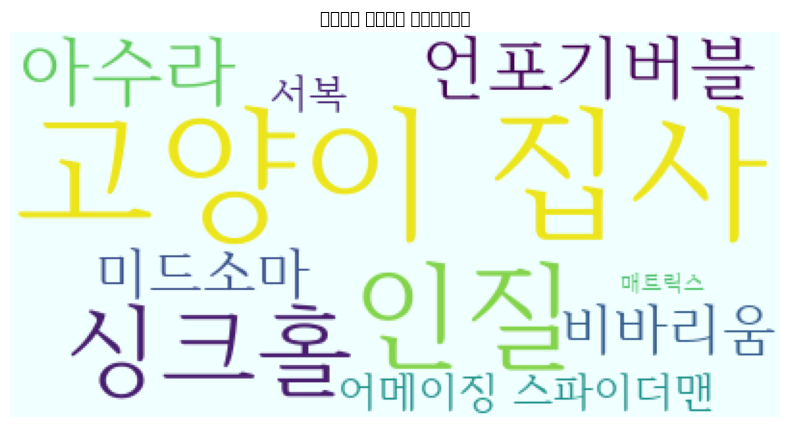

In [58]:
wc = WordCloud(font_path=wc_font, background_color='azure', max_font_size=80, relative_scaling=0.6)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(15, 5))
plt.title('리뷰수별 영화제목 워드클라우드')
plt.imshow(cloud)
plt.axis('off')
plt.show()